In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics
import seaborn as sns

In [2]:
# Import data set

#survey_data=pd.read_csv("../NIHMS50746-supplement-AZ_chemsurvey_QED.csv")
df=pd.read_csv("../CS287-Project/data/PubChemData.csv")
df

,SMILES,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED
0,[H]c1nc(C([H])(C#N)c2nc3c([H])c([H])c([H])c([H...,0.251053,79.0614,22,293.286,2.53198,5.0,0.0,97.64,3.0,3.0,2.0,0.545599
1,[H]c1c([H])c(-n2c(=O)n3n(c2=O)C([H])([H])C([H]...,0.129006,63.4810,18,249.245,0.73360,2.0,0.0,48.93,1.0,2.0,0.0,0.747875
2,[H]O[C@]1(c2c([H])oc([H])c2[H])OC(=O)C([H])=C2...,0.798935,125.4138,35,482.573,4.45350,7.0,1.0,103.04,2.0,1.0,1.0,0.621189
3,[H]C1([H])C(=O)N2C([H])([H])[C@]3([H])C([H])([...,0.034461,70.1610,18,248.370,1.87170,2.0,0.0,23.55,0.0,0.0,0.0,0.653212
4,[H]OC1([H])C([H])(c2c([H])nn([H])c2C(=O)N([H])...,0.064913,50.9694,15,211.221,-0.42310,4.0,3.0,101.23,2.0,1.0,0.0,0.617763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88873,[H]OC([H])([H])C1=C([H])C([H])([H])[C@]2([H])C...,0.925964,88.2856,22,304.474,3.91860,2.0,2.0,40.46,1.0,0.0,1.0,0.720902
88874,[H]OC(=O)C([H])([H])N([H])C(=O)C1(N([H])C(=O)C...,0.113655,59.0416,17,243.263,-1.42510,5.0,4.0,121.52,5.0,0.0,0.0,0.471624
88875,[H]OC(=O)c1c([H])n(O[H])c([H])c([H])/c1=N\c1c(...,0.271177,60.2408,17,230.223,1.65600,3.0,2.0,74.82,2.0,2.0,1.0,0.770170
88876,[H]c1c([H])c([H])c(S(=O)(=O)On2c(=O)c3sc(C([H]...,0.250121,79.4455,22,339.354,0.27222,6.0,1.0,111.12,3.0,3.0,0.0,0.733170


In [3]:
# Filter out DES columns

#survey_data = survey_data.filter(['DO_CHEMISTRY','CHEMISTRY_COMMENT','MW', 'ALOGP', 'HBD', 'HBA', 'PSA', 'ROTB', 'AROM', 'ALERTS', 'UNWEIGHTED_QED', 'QED'], axis = 1)
#survey_data

In [4]:
# Lipinski function

def lipinski(MW, ALOGP, HBD, HBA):
    strike = 0
    if MW > 500:
        strike = strike + 1
    if ALOGP > 5:
        strike = strike + 1
    if HBD > 5:
        strike = strike + 1
    if HBA > 10:
        strike = strike + 1
    if strike > 1:
        return 'Not Drug-like'
    else: 
        return 'Drug-like'

In [5]:
# Run function on all rows

lip = []
for i in range(0, len(df)):
    lip.append(lipinski(df.loc[i,'MW'], df.loc[i,'ALOGP'], df.loc[i,'HBD'], df.loc[i,'HBA']))

In [6]:
# Create new Lipinski feature

df['Lipinski'] = lip
df

,SMILES,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski
0,[H]c1nc(C([H])(C#N)c2nc3c([H])c([H])c([H])c([H...,0.251053,79.0614,22,293.286,2.53198,5.0,0.0,97.64,3.0,3.0,2.0,0.545599,Drug-like
1,[H]c1c([H])c(-n2c(=O)n3n(c2=O)C([H])([H])C([H]...,0.129006,63.4810,18,249.245,0.73360,2.0,0.0,48.93,1.0,2.0,0.0,0.747875,Drug-like
2,[H]O[C@]1(c2c([H])oc([H])c2[H])OC(=O)C([H])=C2...,0.798935,125.4138,35,482.573,4.45350,7.0,1.0,103.04,2.0,1.0,1.0,0.621189,Drug-like
3,[H]C1([H])C(=O)N2C([H])([H])[C@]3([H])C([H])([...,0.034461,70.1610,18,248.370,1.87170,2.0,0.0,23.55,0.0,0.0,0.0,0.653212,Drug-like
4,[H]OC1([H])C([H])(c2c([H])nn([H])c2C(=O)N([H])...,0.064913,50.9694,15,211.221,-0.42310,4.0,3.0,101.23,2.0,1.0,0.0,0.617763,Drug-like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88873,[H]OC([H])([H])C1=C([H])C([H])([H])[C@]2([H])C...,0.925964,88.2856,22,304.474,3.91860,2.0,2.0,40.46,1.0,0.0,1.0,0.720902,Drug-like
88874,[H]OC(=O)C([H])([H])N([H])C(=O)C1(N([H])C(=O)C...,0.113655,59.0416,17,243.263,-1.42510,5.0,4.0,121.52,5.0,0.0,0.0,0.471624,Drug-like
88875,[H]OC(=O)c1c([H])n(O[H])c([H])c([H])/c1=N\c1c(...,0.271177,60.2408,17,230.223,1.65600,3.0,2.0,74.82,2.0,2.0,1.0,0.770170,Drug-like
88876,[H]c1c([H])c([H])c(S(=O)(=O)On2c(=O)c3sc(C([H]...,0.250121,79.4455,22,339.354,0.27222,6.0,1.0,111.12,3.0,3.0,0.0,0.733170,Drug-like


### Engineering the Veber feature
The rules for the <a href="https://sci-hub.st/10.1021/jm020017n" target="_blank">Verber metric</a> of drug likeness is defined as such: a molecule has a high probability of good oral bioavailability (and hence druglike) if it has
1) 10 or fewer roatable bonds

2) 12 or fewer H-bond donors and acceptors

In [7]:
# Veber function
def veber(HBD,HBA,ROTB):
    if HBD+HBA<=12:
        if ROTB<=10:
            return "Drug-like"
        else: return "Not Drug-like"
    else: return "Not Drug-like"

In [8]:
# Create new Veber feature as a list
veb = []
for i in range(0, len(df)):
    veb.append(veber(df.loc[i,'HBD'], df.loc[i,'HBA'], df.loc[i,'ROTB']))

In [9]:
# Add Veber list to the dataframe
df['Veber']=veb
df

,SMILES,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski,Veber
0,[H]c1nc(C([H])(C#N)c2nc3c([H])c([H])c([H])c([H...,0.251053,79.0614,22,293.286,2.53198,5.0,0.0,97.64,3.0,3.0,2.0,0.545599,Drug-like,Drug-like
1,[H]c1c([H])c(-n2c(=O)n3n(c2=O)C([H])([H])C([H]...,0.129006,63.4810,18,249.245,0.73360,2.0,0.0,48.93,1.0,2.0,0.0,0.747875,Drug-like,Drug-like
2,[H]O[C@]1(c2c([H])oc([H])c2[H])OC(=O)C([H])=C2...,0.798935,125.4138,35,482.573,4.45350,7.0,1.0,103.04,2.0,1.0,1.0,0.621189,Drug-like,Drug-like
3,[H]C1([H])C(=O)N2C([H])([H])[C@]3([H])C([H])([...,0.034461,70.1610,18,248.370,1.87170,2.0,0.0,23.55,0.0,0.0,0.0,0.653212,Drug-like,Drug-like
4,[H]OC1([H])C([H])(c2c([H])nn([H])c2C(=O)N([H])...,0.064913,50.9694,15,211.221,-0.42310,4.0,3.0,101.23,2.0,1.0,0.0,0.617763,Drug-like,Drug-like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88873,[H]OC([H])([H])C1=C([H])C([H])([H])[C@]2([H])C...,0.925964,88.2856,22,304.474,3.91860,2.0,2.0,40.46,1.0,0.0,1.0,0.720902,Drug-like,Drug-like
88874,[H]OC(=O)C([H])([H])N([H])C(=O)C1(N([H])C(=O)C...,0.113655,59.0416,17,243.263,-1.42510,5.0,4.0,121.52,5.0,0.0,0.0,0.471624,Drug-like,Drug-like
88875,[H]OC(=O)c1c([H])n(O[H])c([H])c([H])/c1=N\c1c(...,0.271177,60.2408,17,230.223,1.65600,3.0,2.0,74.82,2.0,2.0,1.0,0.770170,Drug-like,Drug-like
88876,[H]c1c([H])c([H])c(S(=O)(=O)On2c(=O)c3sc(C([H]...,0.250121,79.4455,22,339.354,0.27222,6.0,1.0,111.12,3.0,3.0,0.0,0.733170,Drug-like,Drug-like


### Engineering the Ghose Feature

The rules for the Ghose metric of drug likeness is defined as such: a molecule has a high probability of good oral bioavailability (and hence druglike) if it has

1) Log P between -0.4 and 5.6 

2) Molecular weight between 160 and 480

3) Molar refractivity between 40 and 130

4) Total number of atoms between 20 and 70

In [10]:
# TEMPORARY MR AND ATOM EMPTY COLUMNS
#df['MR'] = np.nan
#df['ATOM'] = np.nan

In [11]:
# Ghose function
def ghose(MW, ALOGP, MR, ATOM):
    strike = 0
    if MW <= 160 or MW >= 480:
        strike = strike + 1
    if ALOGP <= -0.4 or ALOGP >= 5.6:
        strike = strike + 1
    if MR <= 40 or MR >= 130:
        strike = strike + 1
    if ATOM <= 20 or ATOM >= 70:
        strike = strike + 1
    if strike == 0:
        return 'Drug-like'
    else: 
        return 'Not Drug-like'

In [12]:
# Create new Ghose feature as a list
gho = []
for i in range(0, len(df)):
    gho.append(ghose(df.loc[i,'MW'], df.loc[i, 'ALOGP'], df.loc[i,'MR'], df.loc[i,'ATOM']))

In [13]:
# Add Ghose list to the dataframe as additional feature
df['Ghose'] = gho
df

,SMILES,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski,Veber,Ghose
0,[H]c1nc(C([H])(C#N)c2nc3c([H])c([H])c([H])c([H...,0.251053,79.0614,22,293.286,2.53198,5.0,0.0,97.64,3.0,3.0,2.0,0.545599,Drug-like,Drug-like,Drug-like
1,[H]c1c([H])c(-n2c(=O)n3n(c2=O)C([H])([H])C([H]...,0.129006,63.4810,18,249.245,0.73360,2.0,0.0,48.93,1.0,2.0,0.0,0.747875,Drug-like,Drug-like,Not Drug-like
2,[H]O[C@]1(c2c([H])oc([H])c2[H])OC(=O)C([H])=C2...,0.798935,125.4138,35,482.573,4.45350,7.0,1.0,103.04,2.0,1.0,1.0,0.621189,Drug-like,Drug-like,Not Drug-like
3,[H]C1([H])C(=O)N2C([H])([H])[C@]3([H])C([H])([...,0.034461,70.1610,18,248.370,1.87170,2.0,0.0,23.55,0.0,0.0,0.0,0.653212,Drug-like,Drug-like,Not Drug-like
4,[H]OC1([H])C([H])(c2c([H])nn([H])c2C(=O)N([H])...,0.064913,50.9694,15,211.221,-0.42310,4.0,3.0,101.23,2.0,1.0,0.0,0.617763,Drug-like,Drug-like,Not Drug-like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88873,[H]OC([H])([H])C1=C([H])C([H])([H])[C@]2([H])C...,0.925964,88.2856,22,304.474,3.91860,2.0,2.0,40.46,1.0,0.0,1.0,0.720902,Drug-like,Drug-like,Drug-like
88874,[H]OC(=O)C([H])([H])N([H])C(=O)C1(N([H])C(=O)C...,0.113655,59.0416,17,243.263,-1.42510,5.0,4.0,121.52,5.0,0.0,0.0,0.471624,Drug-like,Drug-like,Not Drug-like
88875,[H]OC(=O)c1c([H])n(O[H])c([H])c([H])/c1=N\c1c(...,0.271177,60.2408,17,230.223,1.65600,3.0,2.0,74.82,2.0,2.0,1.0,0.770170,Drug-like,Drug-like,Not Drug-like
88876,[H]c1c([H])c([H])c(S(=O)(=O)On2c(=O)c3sc(C([H]...,0.250121,79.4455,22,339.354,0.27222,6.0,1.0,111.12,3.0,3.0,0.0,0.733170,Drug-like,Drug-like,Drug-like


## Exploratory Data Analysis

In [14]:
# df[df['QED'] > 0.67]
# DOCHEM=df[df['DO_CHEMISTRY'] == 'YES']
# DOCHEM['QED'].mean()

### Mean QED

In [15]:
# mean QED overall : 0.5582616251394705
df['QED'].mean()

0.5582616251394705

In [16]:
# mean QED for rows that fail Lipinski test : 0.1946812108011183
not_drug = df[df['Lipinski'] == 'Not Drug-like']
not_drug['QED'].mean()

0.1946812108011183

In [17]:
# mean QED for rows that pass Lipinski test : 0.5736234572457286
drug = df[df['Lipinski'] == 'Drug-like']
drug['QED'].mean()

0.5736234572457286

In [18]:
# mean QED for rows that fail Veber test : 0.27050335439980183
not_drug = df[df['Veber'] == 'Not Drug-like']
not_drug['QED'].mean()

0.27050335439980183

In [19]:
# mean QED for rows that pass Veber test : 0.5856845681135301
drug = df[df['Veber'] == 'Drug-like']
drug['QED'].mean()

0.5856845681135301

In [20]:
# mean QED for rows that fail Ghose test : 0.5382745465606628
not_drug = df[df['Ghose'] == 'Not Drug-like']
not_drug['QED'].mean()

0.5382745465606628

In [21]:
# mean QED for rows that pass Ghose test : 0.5995195584526724
drug = df[df['Ghose'] == 'Drug-like']
drug['QED'].mean()

0.5995195584526724

### Comparing Lipinski, Veber, and Ghose

In [22]:
lip_count = df['Lipinski'].value_counts()
# Drug-like        85275 (95.95%)
# Not Drug-like     3603 (4.05%)

In [23]:
veb_count = df['Veber'].value_counts()
# Drug-like        81145 (91.30%)
# Not Drug-like     7733 (8.70%)

In [24]:
gho_count = df['Ghose'].value_counts()
# Drug-like        59873 (67.37%)
# Not Drug-like    29005 (32.63%)

In [25]:
# convert to str to use boolean
df['Lipinski'] = df['Lipinski'].astype("string")
df['Veber'] = df['Veber'].astype("string")

In [26]:
# number of rows where molecule is considered drug-like under Lipinski, Veber, and Ghose 26,945
all_yes = df[(df['Lipinski'] == 'Drug-like') & (df['Veber'] == 'Drug-like') & (df['Ghose'] == 'Drug-like')]

In [27]:
# number of rows where molecule is considered not drug-like under Lipinski, Veber, and Ghose 2,013
all_no = df[(df['Lipinski'] == 'Not Drug-like') & (df['Veber'] == 'Not Drug-like') & (df['Ghose'] == 'Not Drug-like')]

In [28]:
# number of rows where molecule is considered drug-like under both Lipinski and Veber
lip_yes_veb_yes = df[(df['Lipinski'] == 'Drug-like') & (df['Veber'] == 'Drug-like')] # 79,586

In [29]:
# number of rows where molecule is considered not drug-like under both Lipinski and Veber
lip_no_veb_no = df[(df['Lipinski'] == 'Not Drug-like') & (df['Veber'] == 'Not Drug-like')] # 2,044

In [30]:
# number of rows where molecule is considered drug-like under Lipinski but not under Veber
lip_yes_veb_no = df[(df['Lipinski'] == 'Drug-like') & (df['Veber'] == 'Not Drug-like')] # 5,689

In [31]:
# number of rows where molecule is considered drug-like under Veber but not under Lipinski
lip_no_veb_yes = df[(df['Lipinski'] == 'Not Drug-like') & (df['Veber'] == 'Drug-like')] # 1,559

In [32]:
# number of rows where molecule is considered drug-like under both Veber and Ghose
veb_yes_gho_yes = df[(df['Ghose'] == 'Drug-like') & (df['Veber'] == 'Drug-like')] # 26,946

In [33]:
# number of rows where molecule is considered not drug-like under both Veber and Ghose
veb_no_gho_no = df[(df['Ghose'] == 'Not Drug-like') & (df['Veber'] == 'Not Drug-like')] # 5,674

In [34]:
# number of rows where molecule is considered drug-like under Veber but not under Ghose
veb_yes_gho_no = df[(df['Veber'] == 'Drug-like') & (df['Ghose'] == 'Not Drug-like')] # 54,199

In [35]:
# number of rows where molecule is considered drug-like under Ghose but not under Veber
veb_no_gho_yes = df[(df['Veber'] == 'Not Drug-like') & (df['Ghose'] == 'Drug-like')] # 2,059

In [36]:
# number of rows where molecule is considered drug-like under both Lipinski and Ghose
lip_yes_gho_yes = df[(df['Lipinski'] == 'Drug-like') & (df['Ghose'] == 'Drug-like')] # 28,973

In [37]:
# number of rows where molecule is considered not drug-like under both Lipinski and Ghose
lip_no_gho_no = df[(df['Lipinski'] == 'Not Drug-like') & (df['Ghose'] == 'Not Drug-like')] # 3,571

In [38]:
# number of rows where molecule is considered drug-like under Lipinski but not under Ghose
lip_yes_gho_no = df[(df['Lipinski'] == 'Drug-like') & (df['Ghose'] == 'Not Drug-like')] # 56,302

In [39]:
# number of rows where molecule is considered drug-like under Ghose but not under Lipinski
lip_no_gho_yes = df[(df['Lipinski'] == 'Not Drug-like') & (df['Ghose'] == 'Drug-like')] # 32

### Engineer features to count how many strikes each molecule had and identify reasons why Lipinski failed

In [40]:
# Split data based on whether Lipinski passed or failed
passed_lip = df[df['Lipinski'] == 'Drug-like'].reset_index()
failed_lip = df[df['Lipinski'] == 'Not Drug-like'].reset_index()

In [41]:
# Create function to count number of strikes

def strike_ct(MW, ALOGP, HBD, HBA):
    strike = 0
    if MW > 500:
        strike = strike + 1
    if ALOGP > 5:
        strike = strike + 1
    if HBD > 5:
        strike = strike + 1
    if HBA > 10:
        strike = strike + 1
    return strike

In [42]:
# function to identify which criteria was violated (if any) if Lipinski passed

def passed_lip_violation(MW, ALOGP, HBD, HBA):
    strike = 0
    if MW > 500:
        strike = strike + 1
        if strike == 1:
            return 'High MW'
    if ALOGP > 5:
        strike = strike + 1
        if strike == 1:
            return 'High ALOGP'
    if HBD > 5:
        strike = strike + 1
        if strike == 1:
            return 'High HBD'
    if HBA > 10:
        strike = strike + 1
        if strike == 1:
            return 'High HBD'
    if strike == 0:
        return 'No violation'
    
# Add as new features to Passed Lipinski dataframe
    
passed_lip_lst = []
for i in range(0, len(passed_lip)):
    passed_lip_lst.append(passed_lip_violation(passed_lip.loc[i,'MW'], passed_lip.loc[i,'ALOGP'], passed_lip.loc[i,'HBD'], passed_lip.loc[i,'HBA']))
    
num_strikes = []
for i in range(0, len(passed_lip)):
    num_strikes.append(strike_ct(passed_lip.loc[i,'MW'], passed_lip.loc[i,'ALOGP'], passed_lip.loc[i,'HBD'], passed_lip.loc[i,'HBA']))

passed_lip['Number of Lipinski Violations'] = num_strikes
passed_lip['Lipinski Violation Reason'] = passed_lip_lst

passed_lip

,index,SMILES,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski,Veber,Ghose,Number of Lipinski Violations,Lipinski Violation Reason
0,0,[H]c1nc(C([H])(C#N)c2nc3c([H])c([H])c([H])c([H...,0.251053,79.0614,22,293.286,2.53198,5.0,0.0,97.64,3.0,3.0,2.0,0.545599,Drug-like,Drug-like,Drug-like,0,No violation
1,1,[H]c1c([H])c(-n2c(=O)n3n(c2=O)C([H])([H])C([H]...,0.129006,63.4810,18,249.245,0.73360,2.0,0.0,48.93,1.0,2.0,0.0,0.747875,Drug-like,Drug-like,Not Drug-like,0,No violation
2,2,[H]O[C@]1(c2c([H])oc([H])c2[H])OC(=O)C([H])=C2...,0.798935,125.4138,35,482.573,4.45350,7.0,1.0,103.04,2.0,1.0,1.0,0.621189,Drug-like,Drug-like,Not Drug-like,0,No violation
3,3,[H]C1([H])C(=O)N2C([H])([H])[C@]3([H])C([H])([...,0.034461,70.1610,18,248.370,1.87170,2.0,0.0,23.55,0.0,0.0,0.0,0.653212,Drug-like,Drug-like,Not Drug-like,0,No violation
4,4,[H]OC1([H])C([H])(c2c([H])nn([H])c2C(=O)N([H])...,0.064913,50.9694,15,211.221,-0.42310,4.0,3.0,101.23,2.0,1.0,0.0,0.617763,Drug-like,Drug-like,Not Drug-like,0,No violation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85270,88873,[H]OC([H])([H])C1=C([H])C([H])([H])[C@]2([H])C...,0.925964,88.2856,22,304.474,3.91860,2.0,2.0,40.46,1.0,0.0,1.0,0.720902,Drug-like,Drug-like,Drug-like,0,No violation
85271,88874,[H]OC(=O)C([H])([H])N([H])C(=O)C1(N([H])C(=O)C...,0.113655,59.0416,17,243.263,-1.42510,5.0,4.0,121.52,5.0,0.0,0.0,0.471624,Drug-like,Drug-like,Not Drug-like,0,No violation
85272,88875,[H]OC(=O)c1c([H])n(O[H])c([H])c([H])/c1=N\c1c(...,0.271177,60.2408,17,230.223,1.65600,3.0,2.0,74.82,2.0,2.0,1.0,0.770170,Drug-like,Drug-like,Not Drug-like,0,No violation
85273,88876,[H]c1c([H])c([H])c(S(=O)(=O)On2c(=O)c3sc(C([H]...,0.250121,79.4455,22,339.354,0.27222,6.0,1.0,111.12,3.0,3.0,0.0,0.733170,Drug-like,Drug-like,Drug-like,0,No violation


In [43]:
# Look as distribution of violations/reasons

lip_pass_reason = passed_lip['Lipinski Violation Reason'].value_counts()

# No violation    73649
# High ALOGP       8611
# High MW          2061
# High HBD         954

In [44]:
# function to identify which criteria was violated for failed Lipinski

def failed_lip_violation(MW, ALOGP, HBD, HBA):
    if MW > 500 and ALOGP > 5 and HBD <= 5 and HBA <= 10:
        return 'MW ALOGP'
    if MW > 500 and HBD > 5 and ALOGP <= 5 and HBA <=10:
        return 'MW HBD'
    if MW > 500 and HBA > 10 and ALOGP <= 5 and HBD <= 5:
        return 'MW HBA'
    if ALOGP > 5 and HBD > 5 and MW <=500 and HBA <=10:
        return 'ALOGP HBD'
    if ALOGP > 5 and HBA > 10 and MW <=500 and HBD <= 5:
        return 'ALOGP HBA'
    if HBD > 5 and HBA > 10 and MW <= 500 and ALOGP <= 5: 
        return 'HBD HBA'
    if MW > 500 and ALOGP > 5 and HBD > 5 and HBA <=10:
        return 'MW ALOGP HBD' 
    if MW > 500 and ALOGP > 5 and HBA > 10 and HBD <=5:
        return 'MW ALOGP HBA' 
    if ALOGP > 5 and HBA > 10 and HBD >5 and MW <=500:
        return 'ALOGP HBA HBD' 
    if MW > 500 and HBA > 10 and HBD >5 and ALOGP <=5:
        return 'MW HBA HBD'
    if MW > 500 and ALOGP > 5 and HBD > 5 and HBA > 10:
        return 'MW ALOGP HBD HBA'
    
# Add as new features to Failed Lipinski dataframe

failed_lip_lst = []
for i in range(0, len(failed_lip)):
    failed_lip_lst.append(failed_lip_violation(failed_lip.loc[i,'MW'], failed_lip.loc[i,'ALOGP'], failed_lip.loc[i,'HBD'], failed_lip.loc[i,'HBA']))

strike_count = []
for i in range(0, len(failed_lip)):
    strike_count.append(strike_ct(failed_lip.loc[i,'MW'], failed_lip.loc[i,'ALOGP'], failed_lip.loc[i,'HBD'], failed_lip.loc[i,'HBA']))

failed_lip['Number Lipinski Strikes'] = strike_count
failed_lip['Reason'] = failed_lip_lst

failed_lip

,index,SMILES,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski,Veber,Ghose,Number Lipinski Strikes,Reason
0,92,[H]OC([H])(C([H])([H])Oc1c([H])c([H])c([H])c2c...,0.934498,141.9579,34,524.459,5.00510,4.0,4.0,86.38,10.0,4.0,1.0,0.220012,Not Drug-like,Drug-like,Not Drug-like,2,MW ALOGP
1,97,[H]c1c([H])c([N+](=O)[O-])c([H])c(C([H])([H])n...,0.143840,128.3388,33,509.415,6.05880,6.0,1.0,113.28,9.0,3.0,2.0,0.277193,Not Drug-like,Drug-like,Not Drug-like,2,MW ALOGP
2,121,[H]C([H])=C([H])C(=O)OC([H])([H])C([H])([H])C(...,0.613203,86.2450,44,718.191,8.65630,2.0,0.0,26.30,14.0,0.0,3.0,0.102222,Not Drug-like,Not Drug-like,Not Drug-like,2,MW ALOGP
3,127,[H]Oc1c(/N=N/c2c([H])c(S(=O)(=O)O[H])c([H])c([...,0.985130,180.1251,54,851.178,4.66510,17.0,7.0,329.34,10.0,5.0,4.0,0.043439,Not Drug-like,Not Drug-like,Not Drug-like,3,MW HBA HBD
4,147,[H]c1c([H])c([H])c(C2=C3C(=O)C(=O)N(c4c([H])c(...,0.084055,163.6550,42,547.614,7.01340,3.0,0.0,60.93,5.0,5.0,1.0,0.222421,Not Drug-like,Drug-like,Not Drug-like,2,MW ALOGP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,88704,[H]Oc1c2c(c(O[H])c3c1C([H])([H])[C@@](O[H])(C(...,0.945322,130.3426,38,527.526,1.02890,11.0,5.0,185.84,4.0,3.0,1.0,0.305129,Not Drug-like,Not Drug-like,Not Drug-like,2,MW HBA
3599,88710,[H]c1c([H])c([H])c(-c2c([H])c([H])c([H])c([H])...,0.197190,139.0907,38,500.510,5.14368,6.0,1.0,113.33,7.0,4.0,4.0,0.162632,Not Drug-like,Drug-like,Not Drug-like,2,MW ALOGP
3600,88748,[H]OC(=O)c1c(C([H])([H])C([H])([H])[H])nc(C([H...,0.142593,144.6218,39,559.660,5.41160,7.0,2.0,127.59,12.0,3.0,0.0,0.303613,Not Drug-like,Not Drug-like,Not Drug-like,2,MW ALOGP
3601,88778,[H]C([H])([H])OP(=S)(OC([H])([H])[H])SC([H])([...,0.899347,141.4630,31,544.663,6.29610,11.0,0.0,71.93,13.0,2.0,2.0,0.210797,Not Drug-like,Not Drug-like,Not Drug-like,3,MW ALOGP HBA


In [45]:
# Look at distribution of number of strikes for failed Lipinski

lip_fail_ct = failed_lip['Number Lipinski Strikes'].value_counts()

# 2    2996
# 3     575
# 4     32

In [46]:
# Look at distribution of reasons for failed Lipinski

lip_fail_reason = failed_lip['Reason'].value_counts()

# MW ALOGP            1930
# MW HBA               605
# MW HBA HBD           489
# HBD HBA              306
# MW HBD               151
# MW ALOGP HBA          55
# MW ALOGP HBD HBA      32
# MW ALOGP HBD          30
# ALOGP HBD              3
# ALOGP HBA HBD          1
# ALOGP HBA              1

### Engineer features to count how many strikes each molecule had and identify reasons why Veber failed

In [47]:
def veber_strike(HBD,HBA,ROTB):
    if HBD + HBA <= 12 and ROTB <= 10:
        strike = 0
    if HBD + HBA <= 12 and ROTB > 10:
        strike = 1
    if HBD + HBA > 12 and ROTB <= 10:
        strike = 1
    if HBD + HBA > 12 and ROTB > 10:
        strike = 2
    return strike 

veb_strike = []
for i in range(0, len(df)):
    veb_strike.append(veber_strike(df.loc[i,'HBD'], df.loc[i,'HBA'], df.loc[i,'ROTB']))

df['Veber Strike Count'] = veb_strike


In [48]:
def veber_violation(HBD,HBA,ROTB):
    if HBD + HBA <= 12 and ROTB <= 10:
        return 'No violation'
    if HBD + HBA <= 12 and ROTB > 10:
        return 'ROTB'
    if HBD + HBA > 12 and ROTB <= 10:
        return 'HBD/HBA'
    if HBD + HBA > 12 and ROTB > 10:
        return 'HBD/HBA ROTB'

veb_violation = []
for i in range(0, len(df)):
    veb_violation.append(veber_violation(df.loc[i,'HBD'], df.loc[i,'HBA'], df.loc[i,'ROTB']))

df['Veber Violation Reason'] = veb_violation


In [49]:
veb_strike_count = df['Veber Strike Count'].value_counts()

# 0    81145
# 1     7012
# 2      721

In [50]:
veb_fail_reason = df['Veber Violation Reason'].value_counts()

# No violation    81145
# ROTB             4354
# HBD/HBA          2658
# HBD/HBA ROTB      721


In [51]:
# Drop all entries of 'Veber Violation Reason' that have no violation
veb_violation = df[ (df['Veber Violation Reason'] == 'ROTB') | (df['Veber Violation Reason'] == 'HBD/HBA') | (df['Veber Violation Reason'] == 'HBD/HBA ROTB')]
veb_viol = veb_violation['Veber Violation Reason'].value_counts()

# ROTB            4354
# HBD/HBA         2658
# HBD/HBA ROTB     721

### Engineer features to count how many strikes each molecule had and identify reasons why Ghose failed

In [52]:
def ghose_strike(MW, ALOGP, MR, ATOM):
    if MW > 160 and MW < 480 and ALOGP > -0.4 and ALOGP < 5.6 and MR > 40 and MR < 130 and ATOM > 20 and ATOM < 70:
        strike = 0
    if (MW <= 160 or MW >= 480) and ALOGP > -0.4 and ALOGP < 5.6 and MR > 40 and MR < 130 and ATOM > 20 and ATOM < 70:
        strike = 1
    if MW > 160 and MW < 480 and (ALOGP <= -0.4 or ALOGP >= 5.6) and MR > 40 and MR < 130 and ATOM > 20 and ATOM < 70:
        strike = 1
    if MW > 160 and MW < 480 and ALOGP > -0.4 and ALOGP < 5.6 and (MR <= 40 or MR >= 130) and ATOM > 20 and ATOM < 70:
        strike = 1
    if MW > 160 and MW < 480 and ALOGP > -0.4 and ALOGP < 5.6 and MR > 40 and MR < 130 and (ATOM <= 20 or ATOM >= 70):
        strike = 1
    if (MW <= 160 or MW >= 480) and (ALOGP <= -0.4 or ALOGP >= 5.6) and MR > 40 and MR < 130 and ATOM > 20 and ATOM < 70:
        strike = 2
    if (MW <= 160 or MW >= 480) and ALOGP > -0.4 and ALOGP < 5.6 and (MR <= 40 or MR >= 130) and ATOM > 20 and ATOM < 70:
        strike = 2
    if (MW <= 160 or MW >= 480) and ALOGP > -0.4 and ALOGP < 5.6 and MR > 40 and MR < 130 and (ATOM <= 20 or ATOM >= 70):
        strike = 2
    if MW > 160 and MW < 480 and (ALOGP <= -0.4 or ALOGP >= 5.6) and (MR <= 40 or MR >= 130) and ATOM > 20 and ATOM < 70:
        strike = 2
    if MW > 160 and MW < 480 and (ALOGP <= -0.4 or ALOGP >= 5.6) and MR > 40 and MR < 130 and (ATOM <= 20 or ATOM >= 70):
        strike = 2
    if MW > 160 and MW < 480 and ALOGP > -0.4 and ALOGP < 5.6 and (MR <= 40 or MR >= 130) and (ATOM <= 20 or ATOM >= 70):
        strike = 2
    if MW > 160 and MW < 480 and (ALOGP <= -0.4 or ALOGP >= 5.6) and (MR <= 40 or MR >= 130) and (ATOM <= 20 or ATOM >= 70):
        strike = 3
    if (MW <= 160 or MW >= 480) and ALOGP > -0.4 and ALOGP < 5.6 and (MR <= 40 or MR >= 130) and (ATOM <= 20 or ATOM >= 70):
        strike = 3
    if (MW <= 160 or MW >= 480) and (ALOGP <= -0.4 or ALOGP >= 5.6) and MR > 40 and MR < 130 and (ATOM <= 20 or ATOM >= 70):
        strike = 3
    if (MW <= 160 or MW >= 480) and (ALOGP <= -0.4 or ALOGP >= 5.6) and (MR <= 40 or MR >= 130) and ATOM > 20 and ATOM < 70:
        strike = 3
    if (MW <= 160 or MW >= 480) and (ALOGP <= -0.4 or ALOGP >= 5.6) and (MR <= 40 or MR >= 130) and (ATOM <= 20 or ATOM >= 70):
        strike = 4
    return strike  

gho_strike = []
for i in range(0, len(df)):
    gho_strike.append(ghose_strike(df.loc[i,'MW'], df.loc[i, 'ALOGP'], df.loc[i,'MR'], df.loc[i,'ATOM']))

df['Ghose Strike Count'] = gho_strike

In [53]:
def ghose_violation(MW, ALOGP, MR, ATOM):
    if MW > 160 and MW < 480 and ALOGP > -0.4 and ALOGP < 5.6 and MR > 40 and MR < 130 and ATOM > 20 and ATOM < 70:
        return 'No violation'
    
    if (MW <= 160 or MW >= 480) and ALOGP > -0.4 and ALOGP < 5.6 and MR > 40 and MR < 130 and ATOM > 20 and ATOM < 70:
        return 'High/Low MW'
    if MW > 160 and MW < 480 and (ALOGP <= -0.4 or ALOGP >= 5.6) and MR > 40 and MR < 130 and ATOM > 20 and ATOM < 70:
        return 'High/Low ALOGP'
    if MW > 160 and MW < 480 and ALOGP > -0.4 and ALOGP < 5.6 and (MR <= 40 or MR >= 130) and ATOM > 20 and ATOM < 70:
        return 'High/Low MR'
    if MW > 160 and MW < 480 and ALOGP > -0.4 and ALOGP < 5.6 and MR > 40 and MR < 130 and (ATOM <= 20 or ATOM >= 70):
        return 'High/Low ATOM'
    
    if (MW <= 160 or MW >= 480) and (ALOGP <= -0.4 or ALOGP >= 5.6) and MR > 40 and MR < 130 and ATOM > 20 and ATOM < 70:
        return 'High/Low MW ALOGP'
    if (MW <= 160 or MW >= 480) and ALOGP > -0.4 and ALOGP < 5.6 and (MR <= 40 or MR >= 130) and ATOM > 20 and ATOM < 70:
        return 'High/Low MW MR'
    if (MW <= 160 or MW >= 480) and ALOGP > -0.4 and ALOGP < 5.6 and MR > 40 and MR < 130 and (ATOM <= 20 or ATOM >= 70):
        return 'High/Low MW ATOM'
    if MW > 160 and MW < 480 and (ALOGP <= -0.4 or ALOGP >= 5.6) and (MR <= 40 or MR >= 130) and ATOM > 20 and ATOM < 70:
        return 'High/Low ALOGP MR'
    if MW > 160 and MW < 480 and (ALOGP <= -0.4 or ALOGP >= 5.6) and MR > 40 and MR < 130 and (ATOM <= 20 or ATOM >= 70):
        return 'High/Low ALOGP ATOM'
    if MW > 160 and MW < 480 and ALOGP > -0.4 and ALOGP < 5.6 and (MR <= 40 or MR >= 130) and (ATOM <= 20 or ATOM >= 70):
        return 'High/Low MR ATOM'
    
    if MW > 160 and MW < 480 and (ALOGP <= -0.4 or ALOGP >= 5.6) and (MR <= 40 or MR >= 130) and (ATOM <= 20 or ATOM >= 70):
        return 'High/Low ALOGP MR ATOM'
    if (MW <= 160 or MW >= 480) and ALOGP > -0.4 and ALOGP < 5.6 and (MR <= 40 or MR >= 130) and (ATOM <= 20 or ATOM >= 70):
        return 'High/Low MW MR ATOM'
    if (MW <= 160 or MW >= 480) and (ALOGP <= -0.4 or ALOGP >= 5.6) and MR > 40 and MR < 130 and (ATOM <= 20 or ATOM >= 70):
        return 'High/Low MW ALOGP ATOM'
    if (MW <= 160 or MW >= 480) and (ALOGP <= -0.4 or ALOGP >= 5.6) and (MR <= 40 or MR >= 130) and ATOM > 20 and ATOM < 70:
        return 'High/Low MW ALOGP MR'
    if (MW <= 160 or MW >= 480) and (ALOGP <= -0.4 or ALOGP >= 5.6) and (MR <= 40 or MR >= 130) and (ATOM <= 20 or ATOM >= 70):
        return 'High/Low MW ALOGP MR ATOM'  


gho_violation = []
for i in range(0, len(df)):
    gho_violation.append(ghose_violation(df.loc[i,'MW'], df.loc[i, 'ALOGP'], df.loc[i,'MR'], df.loc[i,'ATOM']))

df['Ghose Violation Reason'] = gho_violation

In [54]:
gho_strike_count = df['Ghose Strike Count'].value_counts()

# 0    29005
# 1    42030
# 2    10774
# 3     6204
# 4      865

In [55]:
gho_fail_reason = df['Ghose Violation Reason'].value_counts()

# High/Low ATOM                35149
# No Violation                 29005
# High/Low ALOGP                5205
# High/Low MW MR ATOM           3684
# High/Low ALOGP ATOM           3495
# High/Low MW MR                2729
# High/Low MW ATOM              2137
# High/Low MW ALOGP MR          1886
# High/Low MW                   1198
# High/Low MW ALOGP MR ATOM      865
# High/Low MR ATOM               827
# High/Low MW ALOGP              817
# High/Low ALOGP MR              769
# High/Low ALOGP MR ATOM         523
# High/Low MR                    478
# High/Low MW ALOGP ATOM         111

In [56]:
# Drop all entries of 'Ghose Violation Reason' that have no violation
gho_violation = df[~(df['Ghose Violation Reason'] == 'No violation')]
gho_viol = gho_violation['Ghose Violation Reason'].value_counts()

## Data Visualization

### Distribution of features

In [57]:
cols = ['MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'ROTB']
cols_means = df[cols].mean()

# MR        80.922386
# ATOM      20.826920
# MW       305.254009
# ALOGP      2.614006
# HBA        3.811326
# HBD        1.248599
# ROTB       4.336574

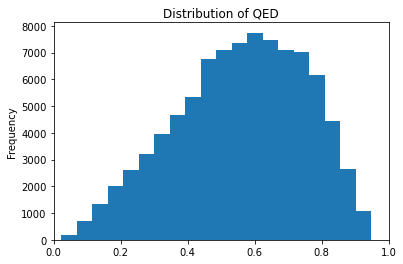

In [58]:
qed = df['QED']
fig, ax = plt.subplots(figsize = (6,4))
qed.plot(kind = 'hist', bins = 20)
ax.set_title("Distribution of QED")
ax.set_xlim(0, 1)
plt.show()

In [59]:
df['Lipinski'] = df['Lipinski'].astype(object)
df['Veber'] = df['Veber'].astype(object)

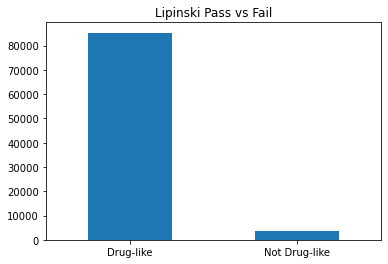

In [60]:
fig, ax = plt.subplots(figsize = (6,4))
df['Lipinski'].value_counts().plot(kind = 'bar')
ax.set_title("Lipinski Pass vs Fail")
plt.xticks(rotation = 360)
plt.show()

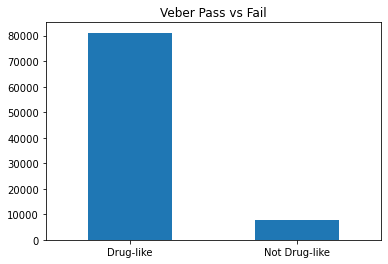

In [61]:
fig, ax = plt.subplots(figsize = (6,4))
df['Veber'].value_counts().plot(kind = 'bar')
ax.set_title("Veber Pass vs Fail")
plt.xticks(rotation = 360)
plt.show()

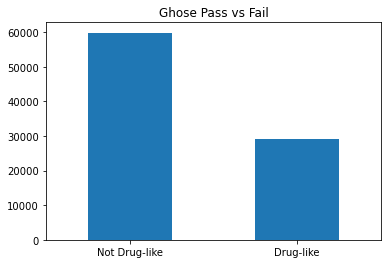

In [62]:
fig, ax = plt.subplots(figsize = (6,4))
df['Ghose'].value_counts().plot(kind = 'bar')
ax.set_title("Ghose Pass vs Fail")
plt.xticks(rotation = 360)
plt.show()

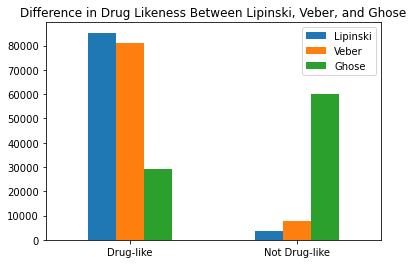

In [63]:
side_by_side = pd.DataFrame({'Lipinski': lip_count,
                   'Veber': veb_count, 'Ghose': gho_count})

ax = side_by_side.plot.bar(rot=0, title = 'Difference in Drug Likeness Between Lipinski, Veber, and Ghose')

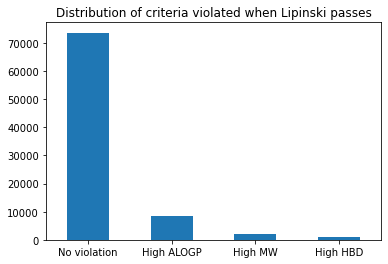

In [64]:
fig, ax = plt.subplots(figsize = (6,4))
lip_pass_reason.plot(kind = 'bar')
ax.set_title('Distribution of criteria violated when Lipinski passes')
plt.xticks(rotation = 360)
plt.show()

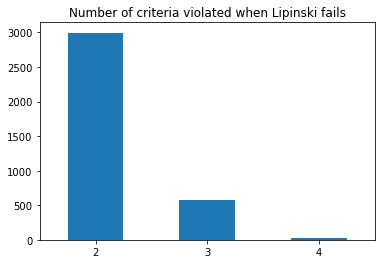

In [65]:
fig, ax = plt.subplots(figsize = (6,4))
lip_fail_ct.plot(kind = 'bar')
ax.set_title('Number of criteria violated when Lipinski fails')
plt.xticks(rotation = 360)
plt.show()

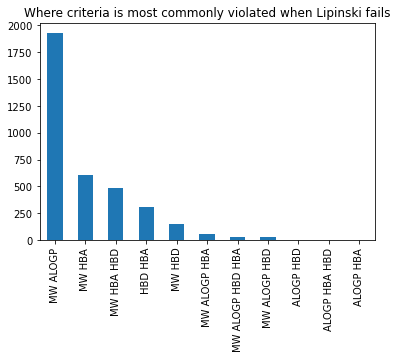

In [66]:
fig, ax = plt.subplots(figsize = (6,4))
lip_fail_reason.plot(kind = 'bar')
ax.set_title('Where criteria is most commonly violated when Lipinski fails')
plt.xticks(rotation = 90)
plt.show()

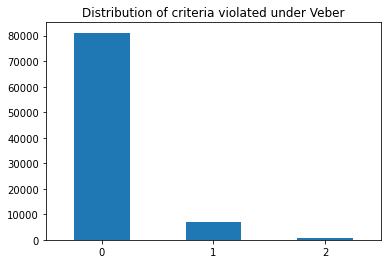

In [67]:
fig, ax = plt.subplots(figsize = (6,4))
veb_strike_count.plot(kind = 'bar')
ax.set_title('Distribution of criteria violated under Veber')
plt.xticks(rotation = 360)
plt.show()

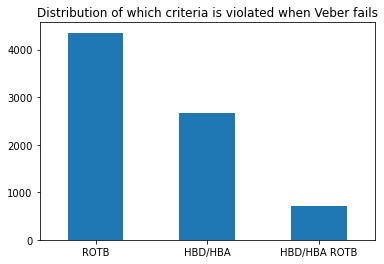

In [68]:
fig, ax = plt.subplots(figsize = (6,4))
veb_viol.plot(kind = 'bar')
ax.set_title('Distribution of which criteria is violated when Veber fails')
plt.xticks(rotation = 360)
plt.show()

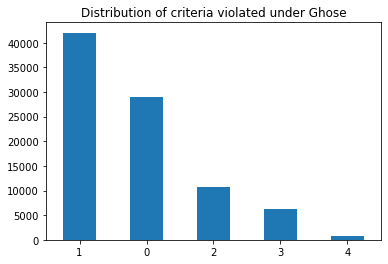

In [69]:
fig, ax = plt.subplots(figsize = (6,4))
gho_strike_count.plot(kind = 'bar')
ax.set_title('Distribution of criteria violated under Ghose')
plt.xticks(rotation = 360)
plt.show()

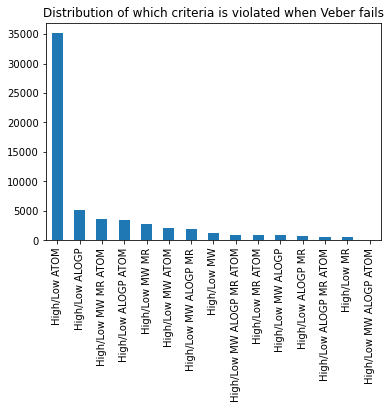

In [70]:
fig, ax = plt.subplots(figsize = (6,4))
gho_viol.plot(kind = 'bar')
ax.set_title('Distribution of which criteria is violated when Veber fails')
plt.xticks(rotation = 90)
plt.show()

## Building a GLM

### Model 1: Just molecular features
For the first model - only the 10 molecular features as predictors

#### Normalizing and Splitting Data

In [89]:
X_mol = df.filter(['MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS']).copy()
y = df['GPCR_act']

# normalizing X_mol
norm_X_mol = normalize(X_mol, axis = 0)

# Split data into training, validating, testing (80:10:10)
train_size=0.8

# This splits the training data (.8) and the remaining data
X_mol_train, X_mol_rem, y_train, y_rem = train_test_split(norm_X_mol, y, train_size=0.8)

# split the remaining data 50/50 for validation and testing
test_size = 0.5

# Splitting the remaining .2 of the data into test and validation
X_mol_valid, X_mol_test, y_valid, y_test = train_test_split(X_mol_rem, y_rem, test_size=0.5)

#### Creating the Model

In [95]:
# Making the GLM model with 10 molecular features as preditors (no drug-likeness)
reg = LinearRegression().fit(X_mol_train, y_train)

# returns the coefficient of determination, aka R-squared value
reg.score(X_mol_train,y_train)

# get the coefficients and intercept of our model
reg.coef_
reg.intercept_

0.07030367738912646

#### Plotting Model Performance

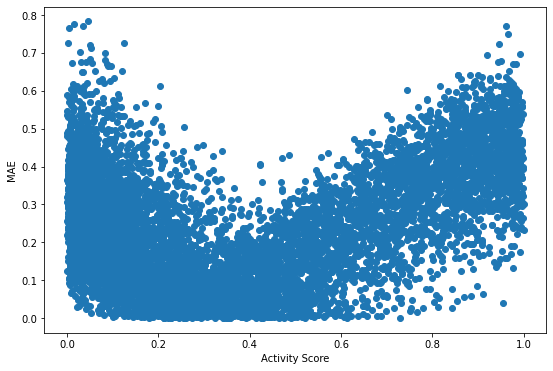

In [194]:
# Graph model predictions vs actual activity scores
preds=reg.predict(X_mol_valid)
len(preds)==len(y_valid)

# reshape arrays b/c god knows why
y_valid=np.array(y_valid).reshape(-1,1)
preds=preds.reshape(-1,1)

# finding the mean abs error
mae=[]
for i in range(0,len(preds)):
    mae.append(metrics.mean_absolute_error(y_valid[i],preds[i]))

In [ ]:
# Making a MAE plot
plt.figure(figsize=(9,6))
plt.xlabel("Activity Score")
plt.ylabel("MAE")
mae_plot=plt.scatter(x=y_valid,y=mae)

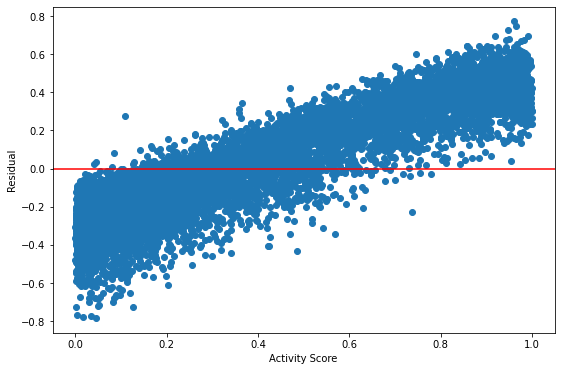

In [193]:
# making a resuldual plot
resid=y_valid-preds
plt.figure(figsize=(9,6))
plt.axhline(y=0,color='red')
plt.xlabel("Activity Score")
plt.ylabel("Residual")
res_plot=plt.scatter(x=y_valid,y=resid)

### Model 2: Drug-Likeness Features

#### Creating Dummy Vars

In [208]:
# split data first
X_dl = df.filter(['QED', 'Ghose','Veber','Lipinski']).copy()
y = df['GPCR_act']

X_dl=pd.get_dummies(X_dl)

#### Splitting Data

In [209]:
# Split data into training, validating, testing (80:10:10)
train_size=0.8

# This splits the training data (.8) and the remaining data
X_dl_train, X_dl_rem, y_train, y_rem = train_test_split(X_dl, y, train_size=0.8)

# split the remaining data 50/50 for validation and testing
test_size = 0.5

# Splitting the remaining .2 of the data into test and validation
X_dl_valid, X_dl_test, y_valid, y_test = train_test_split(X_dl_rem, y_rem, test_size=0.5)

#### Creating the Model

In [210]:
# Making the GLM model with 10 molecular features as preditors (no drug-likeness)
reg2 = LinearRegression().fit(X_dl_train, y_train)

# returns the coefficient of determination, aka R-squared value
reg2.score(X_dl_train,y_train)

# get the coefficients and intercept of our model
reg2.coef_
reg2.intercept_

0.5406560434906948

In [215]:
reg2.coef_

array([ 0.02435357,  0.0707109 , -0.0707109 , -0.06797682,  0.06797682,
       -0.10377241,  0.10377241])

#### Plotting Model Performance

In [212]:
# Graph model predictions vs actual activity scores
preds2=reg2.predict(X_dl_valid)
len(preds)==len(y_valid)

# reshape arrays b/c god knows why
y_valid=np.array(y_valid).reshape(-1,1)
preds2=preds2.reshape(-1,1)

# finding the mean abs error
mae2=[]
for i in range(0,len(preds2)):
    mae2.append(metrics.mean_absolute_error(y_valid[i],preds2[i]))

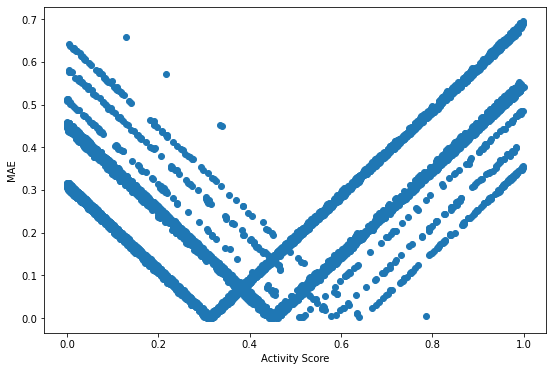

In [213]:
# Making a MAE plot
plt.figure(figsize=(9,6))
plt.xlabel("Activity Score")
plt.ylabel("MAE")
mae_plot=plt.scatter(x=y_valid,y=mae2)

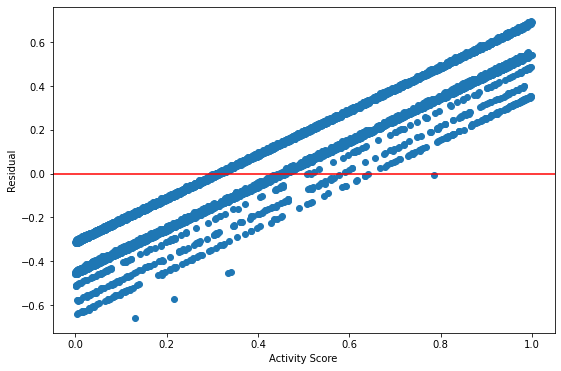

In [214]:
# making a resuldual plot
resid2=y_valid-preds2
plt.figure(figsize=(9,6))
plt.axhline(y=0,color='red')
plt.xlabel("Activity Score")
plt.ylabel("Residual")
res_plot=plt.scatter(x=y_valid,y=resid2)